In [1]:
from transformers import AutoModelForObjectDetection, AutoImageProcessor
import torch
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import os

/home/yang/miniconda3/envs/object_dect/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def draw_bbox(image_path, bboxs, labels, scores, threshold=0.8):
    image = Image.open(image_path).convert("RGB")
    fig, ax = plt.subplots(1)
    ax.imshow(image)

    for box, label, score in zip(bboxs, labels, scores):
        if score >= threshold:
            x_min, y_min, x_max, y_max = box
            width, height = x_max - x_min, y_max - y_min
            rect = patches.Rectangle(
                (x_min, y_min),
                width,
                height,
                linewidth = 2,
                edgecolor = 'r',
                facecolor = 'none'
            )
            ax.add_patch(rect)
            plt.text(
                x_min, 
                y_min, 
                f"{model.config.id2label[label]}: {score:.2f}", 
                color='white', 
                fontsize=12,
                bbox = dict(facecolor='red', alpha=0.5)
            )

    plt.axis('off')
    plt.show()

In [3]:
model_name = "hustvl/yolos-tiny"
image_path_example = "/home/yang/MyRepos/object_detection/images/dog2.jpg"  # Replace with your image path
image_path_root = "/home/yang/MyRepos/object_detection/images" 
image_paths = [os.path.join(image_path_root, x) for x in os.listdir(image_path_root) if x[0]!='.']
print(image_paths)

['/home/yang/MyRepos/object_detection/images/dog4.jpg', '/home/yang/MyRepos/object_detection/images/cat2.jpg', '/home/yang/MyRepos/object_detection/images/cat6.jpg', '/home/yang/MyRepos/object_detection/images/cat1.jpg', '/home/yang/MyRepos/object_detection/images/cat5.jpg', '/home/yang/MyRepos/object_detection/images/dog3.jpg', '/home/yang/MyRepos/object_detection/images/cat4.jpg', '/home/yang/MyRepos/object_detection/images/cat3.jpg', '/home/yang/MyRepos/object_detection/images/dog6.jpg', '/home/yang/MyRepos/object_detection/images/dog2.jpg', '/home/yang/MyRepos/object_detection/images/dog5.jpg', '/home/yang/MyRepos/object_detection/images/dog1.jpg']


In [4]:
# Load model and processor
model = AutoModelForObjectDetection.from_pretrained(model_name)
processor = AutoImageProcessor.from_pretrained(model_name)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [5]:
# Load and preprocess image
image = Image.open(image_path_example).convert("RGB")
print(image)
inputs = processor(images=image, return_tensors = "pt")

# Peform inference
with torch.no_grad():
    outputs = model(**inputs)

# Post-process
target_sizes = torch.tensor([image.size[::-1]]) #(height, width)
print(target_sizes)
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes)[0]

print(results)
print(results['scores'])
print(results['scores'].tolist())
print(results['boxes'])
print(results['boxes'].tolist())
# {'scores': tensor([0.5463, 0.9984, 0.5711, 0.6614]), 'labels': tensor([15, 18, 15, 15]), 'boxes': tensor([[4.8806e+01, 9.0760e+01, 9.6571e+01, 1.0609e+02],
#         [1.1376e+02, 1.7240e+02, 2.1771e+02, 4.0811e+02],
#         [9.6775e+01, 9.2008e+01, 1.6725e+02, 1.1811e+02],
#         [4.5352e-03, 1.8463e+02, 4.4883e+01, 2.2274e+02]])}
print("-----------------------------------------------------------------------------")
for score, label, box in zip(results['scores'], results['labels'], results['boxes']):
    if score >=0.8:
        box = [i for i in box.tolist()]
        print(f"Label: {model.config.id2label[label.item()]}, Score: {score:.2f}, Box: {box}")

<PIL.Image.Image image mode=RGB size=331x500 at 0x719CA3DA97F0>
tensor([[500, 331]])
{'scores': tensor([0.5463, 0.9984, 0.5711, 0.6614]), 'labels': tensor([15, 18, 15, 15]), 'boxes': tensor([[4.8806e+01, 9.0760e+01, 9.6571e+01, 1.0609e+02],
        [1.1376e+02, 1.7240e+02, 2.1771e+02, 4.0811e+02],
        [9.6775e+01, 9.2008e+01, 1.6725e+02, 1.1811e+02],
        [4.5352e-03, 1.8463e+02, 4.4883e+01, 2.2274e+02]])}
tensor([0.5463, 0.9984, 0.5711, 0.6614])
[0.5462687015533447, 0.9984089732170105, 0.5711296796798706, 0.6613867878913879]
tensor([[4.8806e+01, 9.0760e+01, 9.6571e+01, 1.0609e+02],
        [1.1376e+02, 1.7240e+02, 2.1771e+02, 4.0811e+02],
        [9.6775e+01, 9.2008e+01, 1.6725e+02, 1.1811e+02],
        [4.5352e-03, 1.8463e+02, 4.4883e+01, 2.2274e+02]])
[[48.80622482299805, 90.76009368896484, 96.57071685791016, 106.08735656738281], [113.7571029663086, 172.3962860107422, 217.7127227783203, 408.1130065917969], [96.77484893798828, 92.00775909423828, 167.2516326904297, 118.10737609

{'scores': tensor([0.9968]), 'labels': tensor([18]), 'boxes': tensor([[115.8779,  76.1939, 328.9664, 332.9141]])}


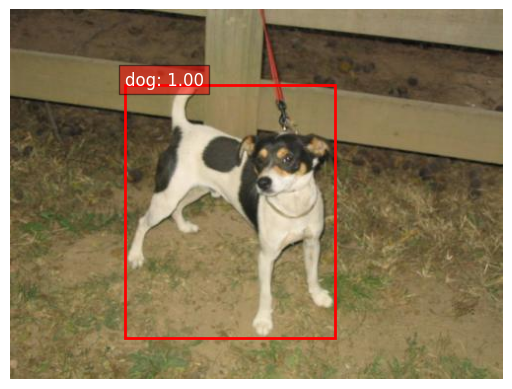

{'scores': tensor([0.8328, 0.5066, 0.6681, 0.9573, 0.5174]), 'labels': tensor([17,  1, 84, 65, 17]), 'boxes': tensor([[ 1.2284e-01,  1.4914e+00,  3.3581e+02,  4.9453e+02],
        [ 4.1488e-01, -6.1467e-01,  2.4738e+02,  3.4964e+02],
        [ 2.1820e+02,  8.2727e-02,  3.3171e+02,  2.6586e+01],
        [-1.7424e-02,  3.7369e+00,  3.3598e+02,  5.0103e+02],
        [ 5.0871e+00, -4.3133e-01,  2.8711e+02,  2.7057e+02]])}


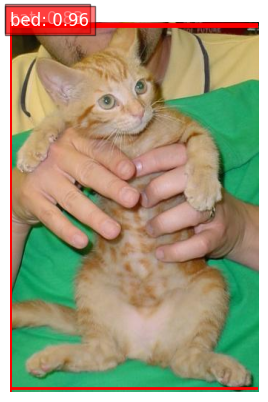

{'scores': tensor([0.9952, 0.9345, 0.6429]), 'labels': tensor([17, 65, 65]), 'boxes': tensor([[ 1.0378e+02,  2.3230e+02,  5.0003e+02,  3.7683e+02],
        [-4.8801e-02,  2.0740e+02,  4.9992e+02,  4.0437e+02],
        [-1.5050e-02,  4.1411e-01,  4.9998e+02,  4.0566e+02]])}


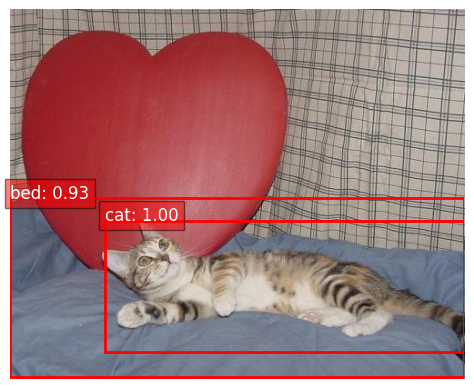

{'scores': tensor([0.9924, 0.5515]), 'labels': tensor([17, 67]), 'boxes': tensor([[ 1.6632e+00,  7.1710e+01,  4.9836e+02,  3.3159e+02],
        [-4.2573e-02,  2.3022e-03,  4.9996e+02,  3.7481e+02]])}


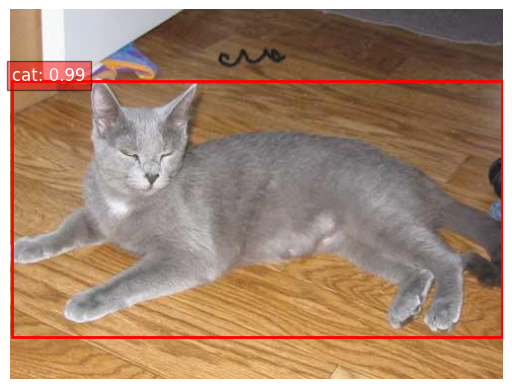

{'scores': tensor([0.9938, 0.5627, 0.9298, 0.6838]), 'labels': tensor([17, 65, 65, 44]), 'boxes': tensor([[ 1.1860e+02,  8.4779e+01,  3.5072e+02,  2.7481e+02],
        [-2.4974e-02,  3.4739e+01,  4.9998e+02,  3.7136e+02],
        [ 4.5449e-02,  3.7134e-01,  5.0005e+02,  3.7336e+02],
        [ 2.2215e+02,  1.6274e-01,  2.5232e+02,  4.5751e+01]])}


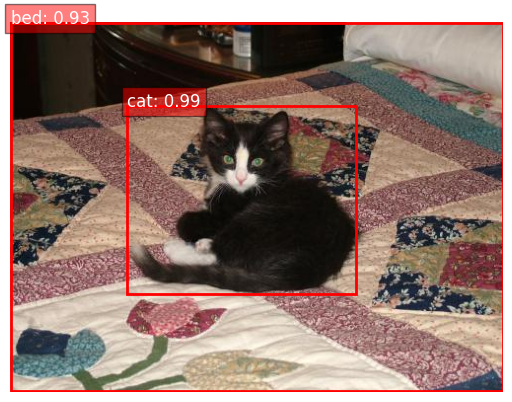

{'scores': tensor([0.9918, 0.9003, 0.9988, 0.7046, 0.6720]), 'labels': tensor([18, 18, 37, 15, 15]), 'boxes': tensor([[8.4884e+01, 3.4723e+01, 2.4748e+02, 2.1782e+02],
        [8.4234e+01, 3.5149e+01, 2.4377e+02, 1.9861e+02],
        [1.4659e+02, 1.6036e+02, 2.1870e+02, 2.3033e+02],
        [1.7911e+02, 6.4897e-02, 3.2529e+02, 3.5899e+01],
        [8.6354e+01, 2.4237e-01, 3.2824e+02, 3.8028e+01]])}


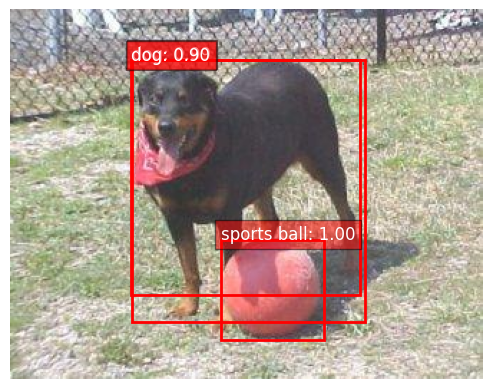

{'scores': tensor([0.9962, 0.9406]), 'labels': tensor([17, 17]), 'boxes': tensor([[ 22.2899,  23.3264, 172.7673, 113.6459],
        [ 20.1594,  24.1789, 124.6449, 113.7866]])}


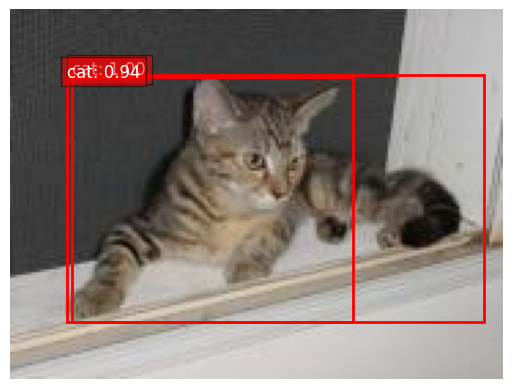

{'scores': tensor([0.9821, 0.6772]), 'labels': tensor([17, 65]), 'boxes': tensor([[7.1030e+01, 3.3410e+01, 2.9540e+02, 4.0089e+02],
        [6.2853e-02, 1.6872e-02, 3.8006e+02, 4.0687e+02]])}


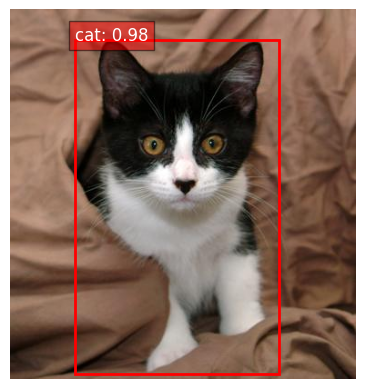

{'scores': tensor([0.8237, 0.9772, 0.6745, 0.7174, 0.9939, 0.5348, 0.6850, 0.6334, 0.9707,
        0.5358, 0.9438]), 'labels': tensor([ 1,  1,  1,  1,  1,  1,  1, 15,  1,  1,  1]), 'boxes': tensor([[131.5029,  95.0080, 216.9142, 202.2633],
        [202.2989, 161.6649, 280.0259, 281.3414],
        [328.4030,  63.5275, 350.0542, 110.7126],
        [321.9207,  63.7735, 341.3922, 110.2944],
        [139.3491, 150.0566, 231.3801, 285.6892],
        [129.9505,  95.8433, 218.2653, 283.3335],
        [218.9861, 162.0874, 278.6251, 277.2319],
        [464.6106, 121.1023, 499.8634, 179.1198],
        [131.0679,  94.8578, 216.2653, 220.1812],
        [346.9470,  60.0196, 369.1275, 110.5688],
        [345.9505,  61.3817, 367.7926, 109.8307]])}


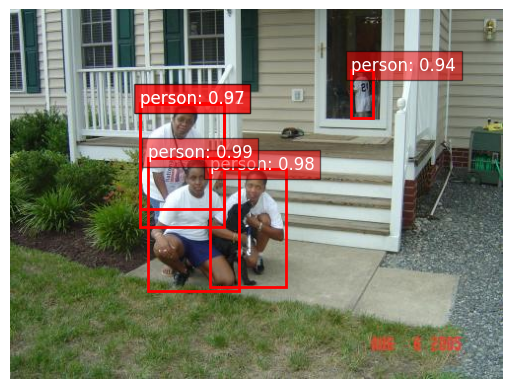

{'scores': tensor([0.5463, 0.9984, 0.5711, 0.6614]), 'labels': tensor([15, 18, 15, 15]), 'boxes': tensor([[4.8806e+01, 9.0760e+01, 9.6571e+01, 1.0609e+02],
        [1.1376e+02, 1.7240e+02, 2.1771e+02, 4.0811e+02],
        [9.6775e+01, 9.2008e+01, 1.6725e+02, 1.1811e+02],
        [4.5352e-03, 1.8463e+02, 4.4883e+01, 2.2274e+02]])}


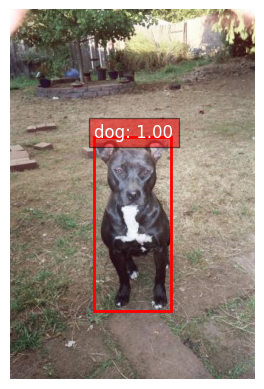

{'scores': tensor([0.9956]), 'labels': tensor([18]), 'boxes': tensor([[141.8348, 110.5060, 336.4731, 248.3749]])}


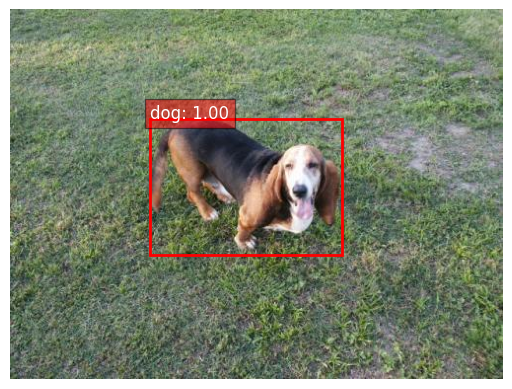

{'scores': tensor([0.5621]), 'labels': tensor([20]), 'boxes': tensor([[ 35.3573,  22.1904, 209.9522, 147.3018]])}


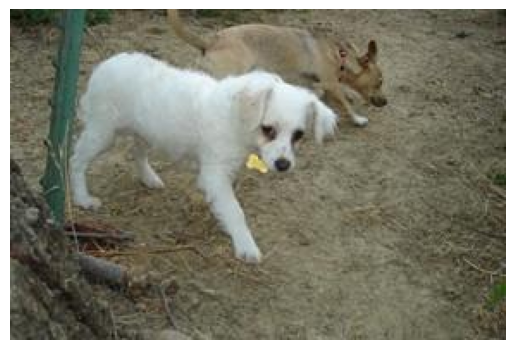

In [6]:
for image_path in image_paths:
    # Load and preprocess image
    image = Image.open(image_path).convert('RGB')
    inputs = processor(images=image, return_tensors = "pt")

    # Peform inference
    with torch.no_grad():
        outputs = model(**inputs)

    # Post-process
    target_sizes = torch.tensor([image.size[::-1]]) #(height, width)
    results = processor.post_process_object_detection(outputs, target_sizes=target_sizes)[0]
    print(results)
    # Print results
    # draw_bbox(image_path, bboxs, labels, scores, threshold=0.8):
    draw_bbox(
        image_path, 
        results['boxes'].tolist(),
        results['labels'].tolist(),
        results['scores'].tolist(),
        threshold=0.8
    )

In [7]:
def greet_person(**kwargs):
    if "name" in kwargs:
        print(f"Hello, {kwargs['name']}!")
    if "age" in kwargs:
        print(f"You are {kwargs['age']} years old.")
    if "city" in kwargs:
        print(f"You live in {kwargs['city']}.")
    
    # You can also iterate through all collected keyword arguments
    for key, value in kwargs.items():
        if key not in ["name", "age", "city"]: # Avoid printing already handled ones
            print(f"Additional info: {key} = {value}")

# Calling the function with various keyword arguments
greet_person(name="Alice", age=30, city="New York")
greet_person(name="Bob", occupation="Engineer")
greet_person(country="USA")

print("-----------------------------------------------------------")
inputs = {'name': "Alice", 'age': 30, 'city': "New Your", 'occupation': "Engineer"}
greet_person(**inputs)
for k, v in inputs.items():
    print(f"key is {k}, and value is {v}")

print("-----------------------------------------------------------")
nums = torch.tensor([0, 1, 2, 3])
print(nums)
for num in nums:
    print(num)
nums = torch.tensor([[0, 1, 2, 3]])
print(nums)
for num in nums:
    print(num)

Hello, Alice!
You are 30 years old.
You live in New York.
Hello, Bob!
Additional info: occupation = Engineer
Additional info: country = USA
-----------------------------------------------------------
Hello, Alice!
You are 30 years old.
You live in New Your.
Additional info: occupation = Engineer
key is name, and value is Alice
key is age, and value is 30
key is city, and value is New Your
key is occupation, and value is Engineer
-----------------------------------------------------------
tensor([0, 1, 2, 3])
tensor(0)
tensor(1)
tensor(2)
tensor(3)
tensor([[0, 1, 2, 3]])
tensor([0, 1, 2, 3])
